## Install packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import NMF
from numpy import asarray
from numpy import savetxt
import matplotlib.colors as mcolors
import matplotlib.cm
import matplotlib.patches as mpatches
import umap
import matplotlib as mpl
import scanpy as sc
import scipy
import kmapper as km
from kmapper import jupyter
from kmapper.plotlyviz import plotlyviz
from kmapper.plotlyviz import *
import plotly.graph_objs as go
import sys
from sklearn import ensemble
import tqdm
from ripser import Rips

## Read in data

In [2]:
data_anndata = sc.read("Racute_Wilson_COVID_Racute.h5ad")
genes = pd.read_csv("gene_Wilson_COVID.csv", header = 0, index_col = 0)

In [3]:
data_anndata

AnnData object with n_obs × n_vars = 4951 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'subject', 'dataset', 'visit', 'percent.mt', 'percent.ig', 'integrated_snn_res.0.6', 'seurat_clusters', 'ident'
    obsm: 'PCA', 'UMAP'

In [4]:
labels = data_anndata.obs['orig.ident'].index
genes = np.reshape(np.array(genes), (2000,))
print(genes)

['CH17-224D4.2' 'JCHAIN' 'ACTG1' ... 'PARP3' 'SLF2' 'ODF3B']


In [5]:
data = data_anndata.X
print("Data shape: "+repr(data.shape))

Data shape: (4951, 2000)


In [6]:
UMAP = data_anndata.obsm["UMAP"]
clusters = data_anndata.obs['seurat_clusters']

print("UMAP shape: "+repr(UMAP.shape))
print("Clusters shape: "+repr(clusters.shape))

UMAP shape: (4951, 2)
Clusters shape: (4951,)


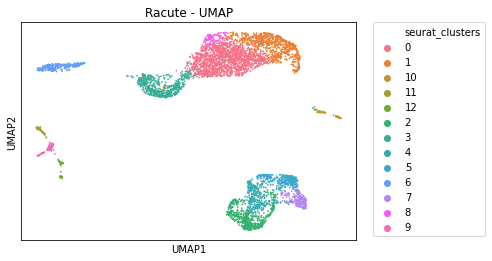

In [7]:
frame1 = sns.scatterplot(UMAP[:,0], UMAP[:,1], s=3, hue = clusters, linewidth = 0)
plt.title('Racute - UMAP')
#plt.xlim(-30000,25000)
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
plt.ylabel('UMAP2')
plt.xlabel('UMAP1')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [8]:
data = scipy.sparse.csr_matrix.toarray(data)
pd_data = pd.DataFrame(data, index = labels, columns = genes)

In [9]:
pd_data

CH17-224D4.2    JCHAIN     ACTG1  CH17-224D4.1  \
R3_AAACCTGAGAGACGAA-1           5.978896 -0.021993 -0.000817      4.075129   
R3_AAACCTGGTAGCTCCG-1           2.945781 -0.000156 -0.139573      1.761128   
R3_AAACGGGCAGGTGCCT-1           1.175410 -0.000843 -0.052532      2.695120   
R3_AAAGATGGTTCGGCAC-1           2.736213 -0.045819 -0.152660      0.529119   
R3_AAAGATGTCCATGCTC-1           1.849255  0.000000 -0.009008      0.037594   
...                                  ...       ...       ...           ...   
R478910_TTTGTCAAGCAACGGT-1      7.155714  0.000000  0.000000      4.460591   
R478910_TTTGTCAAGTGTACCT-1      5.485311  0.000000  0.000000      4.827793   
R478910_TTTGTCACATCCGTGG-1      5.634133  0.000000  0.000000      3.871274   
R478910_TTTGTCAGTGCGCTTG-1      5.981464  0.000000  0.000000      3.971530   
R478910_TTTGTCATCTGGTGTA-1      6.370471  0.000000  0.000000      4.210410   

                               GAPDH    LGALS1      NKG7    S100A4      MZB1  \
R3_AAACCTGAGAGACGAA-1       0.711315  0.015116 -0.004110 -0.007300 -0.001341   
R3_AAACCTGGTAGCTCCG-1       0.222312 -0.000173 -0.032574  0.021247 -0.000153   
R3_AAACGGGCAGGTGCCT-1       0.139050 -0.002109 -0.030267 -0.004191 -0.000369   
R3_AAAGATGGTTCGGCAC-1       0.021068  4.795565 -0.000444  0.009947  0.529055   
R3_AAAGATGTCCATGCTC-1      -0.112659 -0.023813 -0.000172 -0.086673 -0.000833   
...                              ...       ...       ...       ...       ...   
R478910_TTTGTCAAGCAACGGT-1  1.301031  0.000000  0.000000  0.000000  0.000000   
R478910_TTTGTCAAGTGTACCT-1  0.000000  0.000000  0.000000  0.000000  0.000000   
R478910_TTTGTCACATCCGTGG-1  0.000000  0.000000  0.000000  0.000000  0.000000   
R478910_TTTGTCAGTGCGCTTG-1  0.756996  0.000000  0.000000  0.000000  0.000000   
R478910_TTTGTCATCTGGTGTA-1  0.000000  0.000000  0.000000  0.000000  0.000000   

                            AC233755.2  ...      ZEB1   ARL6IP5        MIS18A  \
R3_AAACCTGAGAGACGAA-1        -0.006173  ...  0.142687 -0.029104  1.193707e-06   
R3_AAACCTGGTAGCTCCG-1        -0.000529  ...  0.143498 -0.000169  7.659769e-08   
R3_AAACGGGCAGGTGCCT-1        -0.002433  ... -0.016291 -0.001781  5.900812e-07   
R3_AAAGATGGTTCGGCAC-1         0.000013  ...  0.035276  0.042579  4.355368e-05   
R3_AAAGATGTCCATGCTC-1         0.000000  ...  0.173296  0.000239  0.000000e+00   
...                                ...  ...       ...       ...           ...   
R478910_TTTGTCAAGCAACGGT-1    0.000000  ...  0.000000  0.000000  0.000000e+00   
R478910_TTTGTCAAGTGTACCT-1    0.000000  ...  0.000000  0.000000  0.000000e+00   
R478910_TTTGTCACATCCGTGG-1    0.000000  ...  0.000000  0.000000  0.000000e+00   
R478910_TTTGTCAGTGCGCTTG-1    0.000000  ...  0.000000  0.000000  0.000000e+00   
R478910_TTTGTCATCTGGTGTA-1    0.000000  ...  0.000000  0.000000  0.000000e+00   

                               WASF1      CCT3       NIN   ADAMTS6     PARP3  \
R3_AAACCTGAGAGACGAA-1       0.066697 -0.034129  0.547461  0.033342 -0.004158   
R3_AAACCTGGTAGCTCCG-1      -0.060697  0.002948 -0.072202 -0.000771  0.000224   
R3_AAACGGGCAGGTGCCT-1       1.369268 -0.000034 -0.251041 -0.001615  0.000188   
R3_AAAGATGGTTCGGCAC-1       0.107231  0.001484  0.188684  0.049832  0.000009   
R3_AAAGATGTCCATGCTC-1      -0.005234  0.000000  0.011235 -0.001140  0.000000   
...                              ...       ...       ...       ...       ...   
R478910_TTTGTCAAGCAACGGT-1  0.000000  0.000000  0.000000  0.000000  0.000000   
R478910_TTTGTCAAGTGTACCT-1  0.000000  0.000000  0.000000  0.000000  0.000000   
R478910_TTTGTCACATCCGTGG-1  0.000000  0.726709  0.000000  0.726709  0.000000   
R478910_TTTGTCAGTGCGCTTG-1  0.000000  0.756996  0.000000  0.000000  0.000000   
R478910_TTTGTCATCTGGTGTA-1  0.000000  0.000000  0.000000  0.000000  0.000000   

                                SLF2         ODF3B  
R3_AAACCTGAGAGACGAA-1      -0.000112  5.514414e-07  
R3_AAACCTGGTAGCTCCG-1      -0.000378 -4.448510e-04  
R3_AAACGGGCAGGTGCCT-1      -0.000316 

## Distance Matrix

In [17]:
from manifold_utils.mSVD import eigen_plot, eigen_calc_from_dist_mat, eps_projection
np_data = np.array(pd_data)

In [140]:
N, d = pd_data.shape
np_data = np.array(pd_data) 

dist_mat = np.zeros((N, N))
for j in range(N):
    for k in range(0,N):
        if j != k:
            dist_mat[j, k] = np.linalg.norm(np_data[j, :] - np_data[k, :])

J: 0
J: 1
J: 2
J: 3
J: 4
J: 5
J: 6
J: 7
J: 8
J: 9
J: 10
J: 11
J: 12
J: 13
J: 14
J: 15
J: 16
J: 17
J: 18
J: 19
J: 20
J: 21
J: 22
J: 23
J: 24
J: 25
J: 26
J: 27
J: 28
J: 29
J: 30
J: 31
J: 32
J: 33
J: 34
J: 35
J: 36
J: 37
J: 38
J: 39
J: 40
J: 41
J: 42
J: 43
J: 44
J: 45
J: 46
J: 47
J: 48
J: 49
J: 50
J: 51
J: 52
J: 53
J: 54
J: 55
J: 56
J: 57
J: 58
J: 59
J: 60
J: 61
J: 62
J: 63
J: 64
J: 65
J: 66
J: 67
J: 68
J: 69
J: 70
J: 71
J: 72
J: 73
J: 74
J: 75
J: 76
J: 77
J: 78
J: 79
J: 80
J: 81
J: 82
J: 83
J: 84
J: 85
J: 86
J: 87
J: 88
J: 89
J: 90
J: 91
J: 92
J: 93
J: 94
J: 95
J: 96
J: 97
J: 98
J: 99
J: 100
J: 101
J: 102
J: 103
J: 104
J: 105
J: 106
J: 107
J: 108
J: 109
J: 110
J: 111
J: 112
J: 113
J: 114
J: 115
J: 116
J: 117
J: 118
J: 119
J: 120
J: 121
J: 122
J: 123
J: 124
J: 125
J: 126
J: 127
J: 128
J: 129
J: 130
J: 131
J: 132
J: 133
J: 134
J: 135
J: 136
J: 137
J: 138
J: 139
J: 140
J: 141
J: 142
J: 143
J: 144
J: 145
J: 146
J: 147
J: 148
J: 149
J: 150
J: 151
J: 152
J: 153
J: 154
J: 155
J: 156
J: 157
J: 1

J: 1164
J: 1165
J: 1166
J: 1167
J: 1168
J: 1169
J: 1170
J: 1171
J: 1172
J: 1173
J: 1174
J: 1175
J: 1176
J: 1177
J: 1178
J: 1179
J: 1180
J: 1181
J: 1182
J: 1183
J: 1184
J: 1185
J: 1186
J: 1187
J: 1188
J: 1189
J: 1190
J: 1191
J: 1192
J: 1193
J: 1194
J: 1195
J: 1196
J: 1197
J: 1198
J: 1199
J: 1200
J: 1201
J: 1202
J: 1203
J: 1204
J: 1205
J: 1206
J: 1207
J: 1208
J: 1209
J: 1210
J: 1211
J: 1212
J: 1213
J: 1214
J: 1215
J: 1216
J: 1217
J: 1218
J: 1219
J: 1220
J: 1221
J: 1222
J: 1223
J: 1224
J: 1225
J: 1226
J: 1227
J: 1228
J: 1229
J: 1230
J: 1231
J: 1232
J: 1233
J: 1234
J: 1235
J: 1236
J: 1237
J: 1238
J: 1239
J: 1240
J: 1241
J: 1242
J: 1243
J: 1244
J: 1245
J: 1246
J: 1247
J: 1248
J: 1249
J: 1250
J: 1251
J: 1252
J: 1253
J: 1254
J: 1255
J: 1256
J: 1257
J: 1258
J: 1259
J: 1260
J: 1261
J: 1262
J: 1263
J: 1264
J: 1265
J: 1266
J: 1267
J: 1268
J: 1269
J: 1270
J: 1271
J: 1272
J: 1273
J: 1274
J: 1275
J: 1276
J: 1277
J: 1278
J: 1279
J: 1280
J: 1281
J: 1282
J: 1283
J: 1284
J: 1285
J: 1286
J: 1287
J: 1288


J: 2191
J: 2192
J: 2193
J: 2194
J: 2195
J: 2196
J: 2197
J: 2198
J: 2199
J: 2200
J: 2201
J: 2202
J: 2203
J: 2204
J: 2205
J: 2206
J: 2207
J: 2208
J: 2209
J: 2210
J: 2211
J: 2212
J: 2213
J: 2214
J: 2215
J: 2216
J: 2217
J: 2218
J: 2219
J: 2220
J: 2221
J: 2222
J: 2223
J: 2224
J: 2225
J: 2226
J: 2227
J: 2228
J: 2229
J: 2230
J: 2231
J: 2232
J: 2233
J: 2234
J: 2235
J: 2236
J: 2237
J: 2238
J: 2239
J: 2240
J: 2241
J: 2242
J: 2243
J: 2244
J: 2245
J: 2246
J: 2247
J: 2248
J: 2249
J: 2250
J: 2251
J: 2252
J: 2253
J: 2254
J: 2255
J: 2256
J: 2257
J: 2258
J: 2259
J: 2260
J: 2261
J: 2262
J: 2263
J: 2264
J: 2265
J: 2266
J: 2267
J: 2268
J: 2269
J: 2270
J: 2271
J: 2272
J: 2273
J: 2274
J: 2275
J: 2276
J: 2277
J: 2278
J: 2279
J: 2280
J: 2281
J: 2282
J: 2283
J: 2284
J: 2285
J: 2286
J: 2287
J: 2288
J: 2289
J: 2290
J: 2291
J: 2292
J: 2293
J: 2294
J: 2295
J: 2296
J: 2297
J: 2298
J: 2299
J: 2300
J: 2301
J: 2302
J: 2303
J: 2304
J: 2305
J: 2306
J: 2307
J: 2308
J: 2309
J: 2310
J: 2311
J: 2312
J: 2313
J: 2314
J: 2315


J: 3216
J: 3217
J: 3218
J: 3219
J: 3220
J: 3221
J: 3222
J: 3223
J: 3224
J: 3225
J: 3226
J: 3227
J: 3228
J: 3229
J: 3230
J: 3231
J: 3232
J: 3233
J: 3234
J: 3235
J: 3236
J: 3237
J: 3238
J: 3239
J: 3240
J: 3241
J: 3242
J: 3243
J: 3244
J: 3245
J: 3246
J: 3247
J: 3248
J: 3249
J: 3250
J: 3251
J: 3252
J: 3253
J: 3254
J: 3255
J: 3256
J: 3257
J: 3258
J: 3259
J: 3260
J: 3261
J: 3262
J: 3263
J: 3264
J: 3265
J: 3266
J: 3267
J: 3268
J: 3269
J: 3270
J: 3271
J: 3272
J: 3273
J: 3274
J: 3275
J: 3276
J: 3277
J: 3278
J: 3279
J: 3280
J: 3281
J: 3282
J: 3283
J: 3284
J: 3285
J: 3286
J: 3287
J: 3288
J: 3289
J: 3290
J: 3291
J: 3292
J: 3293
J: 3294
J: 3295
J: 3296
J: 3297
J: 3298
J: 3299
J: 3300
J: 3301
J: 3302
J: 3303
J: 3304
J: 3305
J: 3306
J: 3307
J: 3308
J: 3309
J: 3310
J: 3311
J: 3312
J: 3313
J: 3314
J: 3315
J: 3316
J: 3317
J: 3318
J: 3319
J: 3320
J: 3321
J: 3322
J: 3323
J: 3324
J: 3325
J: 3326
J: 3327
J: 3328
J: 3329
J: 3330
J: 3331
J: 3332
J: 3333
J: 3334
J: 3335
J: 3336
J: 3337
J: 3338
J: 3339
J: 3340


J: 4241
J: 4242
J: 4243
J: 4244
J: 4245
J: 4246
J: 4247
J: 4248
J: 4249
J: 4250
J: 4251
J: 4252
J: 4253
J: 4254
J: 4255
J: 4256
J: 4257
J: 4258
J: 4259
J: 4260
J: 4261
J: 4262
J: 4263
J: 4264
J: 4265
J: 4266
J: 4267
J: 4268
J: 4269
J: 4270
J: 4271
J: 4272
J: 4273
J: 4274
J: 4275
J: 4276
J: 4277
J: 4278
J: 4279
J: 4280
J: 4281
J: 4282
J: 4283
J: 4284
J: 4285
J: 4286
J: 4287
J: 4288
J: 4289
J: 4290
J: 4291
J: 4292
J: 4293
J: 4294
J: 4295
J: 4296
J: 4297
J: 4298
J: 4299
J: 4300
J: 4301
J: 4302
J: 4303
J: 4304
J: 4305
J: 4306
J: 4307
J: 4308
J: 4309
J: 4310
J: 4311
J: 4312
J: 4313
J: 4314
J: 4315
J: 4316
J: 4317
J: 4318
J: 4319
J: 4320
J: 4321
J: 4322
J: 4323
J: 4324
J: 4325
J: 4326
J: 4327
J: 4328
J: 4329
J: 4330
J: 4331
J: 4332
J: 4333
J: 4334
J: 4335
J: 4336
J: 4337
J: 4338
J: 4339
J: 4340
J: 4341
J: 4342
J: 4343
J: 4344
J: 4345
J: 4346
J: 4347
J: 4348
J: 4349
J: 4350
J: 4351
J: 4352
J: 4353
J: 4354
J: 4355
J: 4356
J: 4357
J: 4358
J: 4359
J: 4360
J: 4361
J: 4362
J: 4363
J: 4364
J: 4365


In [11]:
#savetxt('dist_mat_Racute.csv', dist_mat, delimiter=',')

dist_mat = pd.read_csv('dist_mat_Racute.csv', sep=",", header = None)
dist_mat = np.array(dist_mat )

In [12]:
print(dist_mat.shape)

(4951, 4951)


## Witness complex

In [18]:
from time import time
import numpy as np
from tda_utils.density_filtration import sort_distances_per_point, indices_for_density_filtration
from tda_utils.witness_complex import *

dist_per_pt = sort_distances_per_point(dist_mat)

# Load in ILC data
sct_sparse = np_data
dist_mat = dist_mat
n, d = sct_sparse.shape
print("n = "+str(n))
print("d = "+str(d))
print("shape of dist_mat: "+str(dist_mat.shape))

# Load in distances per point
distances_per_point = dist_per_pt

# time computation of density filtrations
print("Timing computation of density filtrations...")
density_indices = dict()
density_filtrations = dict()
ks = [10, 100, 1000]
#      10000]
ps = [0.01, 0.05, 0.1, 0.2]
for k in ks:
    for p in ps:
        print("\tk = "+str(k)+", p = "+str(p)+":")
        start = time()
        indices = indices_for_density_filtration(distances_per_point, k, p)
        density_indices[(k, p)] = indices
        mask = np.zeros(n, dtype=bool)
        mask[indices] = True
        sqr_mask = np.outer(mask, mask)
        density_filtrations[(k, p)] = np.reshape(dist_mat[sqr_mask], (len(indices), len(indices)))
        print("\t"+str(time()-start)+" seconds\n")

print("Timing computation of landmarks...")
landmark_indices = dict()
landmark_mats = dict()
pps = [0.05, 0.1, 0.2]
for k in ks:
    for p in ps:
        for pp in pps:
            print("\tk = "+str(k)+", p = "+str(p)+", pp = "+str(pp)+":")
            start = time()
            landmark_indices[(k, p, pp)], landmark_mats[(k, p, pp)] = choose_landmarks(density_filtrations[(k, p)], pp)
            print("\t"+str(time()-start)+" seconds\n")

print("Printing numbers of landmarks...")
for k in ks:
    for p in ps:
        for pp in pps:
            toople = (k, p, pp)
            print(str(toople)+": "+str(len(landmark_indices[toople])))
            if toople == (1000, 0.2, 0.2):
                print("saving")
                landmark_inds = landmark_indices[toople]
                dense_inds = density_indices[(k, p)]
                true_inds = [dense_inds[ind] for ind in landmark_inds]
                print(true_inds)
                to_save = np.vstack([sct_sparse[ind, :] for ind in true_inds])
                np.save("Wilson_COVID_Racute_landmarks.npy", to_save)
                np.save("Wilson_COVID_Racute_landmark_indices.npy", true_inds)

n = 4951
d = 2000
shape of dist_mat: (4951, 4951)
Timing computation of density filtrations...
	k = 10, p = 0.01:
	0.015003442764282227 seconds

	k = 10, p = 0.05:
	0.01600360870361328 seconds

	k = 10, p = 0.1:
	0.01800370216369629 seconds

	k = 10, p = 0.2:
	0.025005578994750977 seconds

	k = 100, p = 0.01:
	0.015003442764282227 seconds

	k = 100, p = 0.05:
	0.016003847122192383 seconds

	k = 100, p = 0.1:
	0.01800394058227539 seconds

	k = 100, p = 0.2:
	0.027006149291992188 seconds

	k = 1000, p = 0.01:
	0.01400303840637207 seconds

	k = 1000, p = 0.05:
	0.016003847122192383 seconds

	k = 1000, p = 0.1:
	0.0200045108795166 seconds

	k = 1000, p = 0.2:
	0.028006553649902344 seconds

Timing computation of landmarks...
	k = 10, p = 0.01, pp = 0.05:
	0.0010004043579101562 seconds

	k = 10, p = 0.01, pp = 0.1:
	0.0 seconds

	k = 10, p = 0.01, pp = 0.2:
	0.0 seconds

	k = 10, p = 0.05, pp = 0.05:
	0.0 seconds

	k = 10, p = 0.05, pp = 0.1:
	0.0 seconds

	k = 10, p = 0.05, pp = 0.2:
	0.0 s

## Visualize Landmarks

In [25]:
landmarks = np.load("Wilson_COVID_Racute_landmarks.npy")

landmarks = true_inds
print(true_inds)

[131, 4366, 4274, 917, 716, 414, 1716, 4556, 3135, 23, 3037, 641, 2195, 2101, 790, 1112, 11, 538, 4380, 1127, 2382, 3383, 4517, 4001, 722, 2590, 505, 4103, 620, 3373, 3171, 136, 3942, 254, 4221, 893, 1452, 2886, 2710, 631, 1061, 3202, 1047, 1926, 95, 345, 1032, 4391, 3223, 3304, 4823, 1064, 4669, 4070, 1298, 3421, 803, 4346, 2978, 3805, 997, 3415, 4084, 4315, 3619, 4735, 2218, 823, 448, 683, 2541, 4378, 3788, 3368, 4369, 4310, 3562, 1123, 1964, 2965, 148, 1336, 2445, 205, 2459, 670, 821, 332, 65, 932, 147, 2747, 2833, 4367, 1141, 1721, 3786, 80, 1261, 4018, 527, 3727, 4838, 3153, 2812, 2623, 112, 3365, 554, 983, 4842, 713, 719, 1780, 2576, 3241, 2318, 62, 3211, 1797, 1901, 4642, 804, 2517, 2192, 464, 947, 1402, 902, 1660, 209, 4076, 307, 1946, 3962, 2190, 1284, 4710, 1446, 1774, 4240, 2563, 2389, 3487, 603, 2523, 3526, 3794, 3547, 3594, 611, 1071, 2317, 2720, 3049, 1020, 199, 3955, 3333, 4325, 4681, 340, 4491, 352, 255, 2130, 1119, 4730, 1137, 3857, 4110, 757, 4449, 56, 253, 3035, 606,

In [26]:
N, d = np_data.shape

UMAP = np.array(UMAP)
print(UMAP.shape)

UMAP_landmark = np.zeros((1,2))
data_landmark = np.zeros((1,genes.shape[0]))

#Going through all of the cells, if index in landmarks we should pull the associated gene expression data
for i in landmarks:
    next_cell = np_data[i,:]
    next_cell = np.reshape(next_cell, (1, genes.shape[0]))
    data_landmark = np.append(data_landmark, next_cell, axis = 0)
        
    next_embedding = UMAP[i,:]
    next_embedding = np.reshape(next_embedding, (1,2))
    UMAP_landmark = np.append(UMAP_landmark, next_embedding, axis = 0)

#To get the indices to work out I have a row of zeros at the top that I need to omit
data_landmark = data_landmark[1:, :]    
UMAP_landmark = UMAP_landmark[1:, :]

print(data_landmark.shape)
print(UMAP_landmark.shape)

(4951, 2)
(198, 2000)
(198, 2)


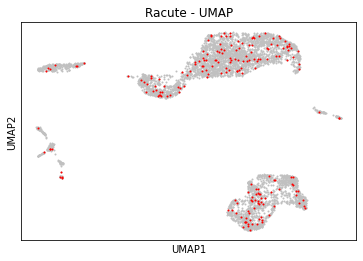

In [27]:
frame1 = plt.scatter(UMAP[:,0], UMAP[:,1], s=1, c = "silver")
frame1 = plt.scatter(UMAP_landmark[:,0], UMAP_landmark[:,1], s=1, c = "red")
plt.title('Racute - UMAP')
#plt.xlim(-30000,25000)
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
plt.ylabel('UMAP2')
plt.xlabel('UMAP1')
plt.show()

## Persistence Diagrams

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


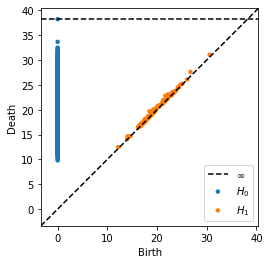

In [152]:
rips = Rips()
diagrams = rips.fit_transform(np_data, distance_matrix=False, metric="euclidean")
rips.plot(diagrams)

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


c:\users\hmkri\desktop\riesenfeld pearson\lib\site-packages\ripser\ripser.py:257: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


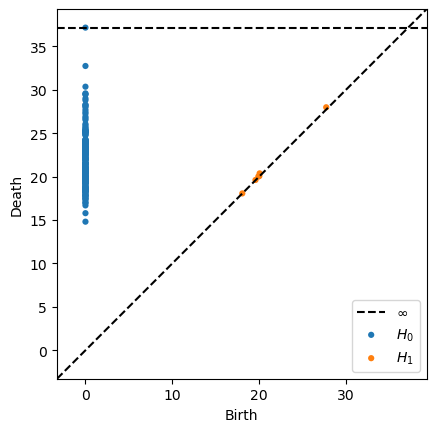

In [153]:
rips = Rips()
diagrams = rips.fit_transform(data_landmark, distance_matrix=False, metric="euclidean")
rips.plot(diagrams)

## Eigen plots

In [28]:
from manifold_utils.mSVD import eigen_plot, eigen_calc_from_dist_mat, eps_projection, eigen_plot_numPoints, eigen_calc_from_dist_mat_withNumPoints
from manifold_utils.iga import chakraborty_express, iga

Landmark: 0


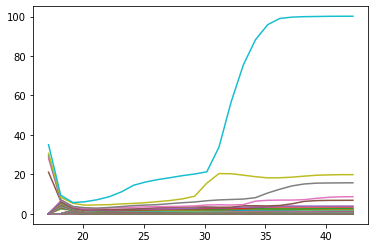

Landmark: 1


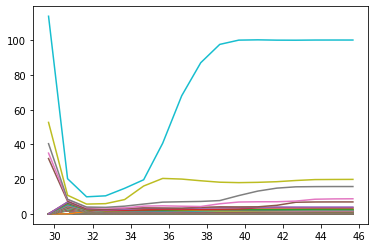

Landmark: 2


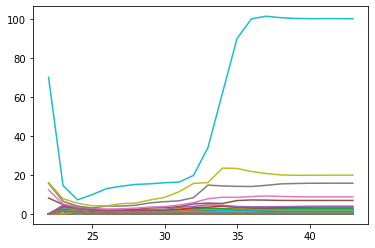

Landmark: 3


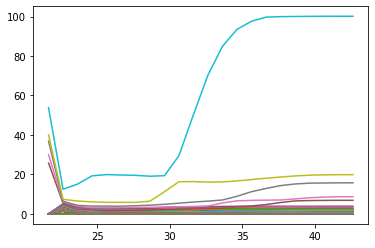

Landmark: 4


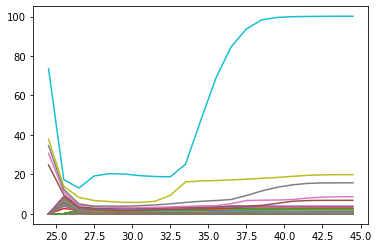

Landmark: 5


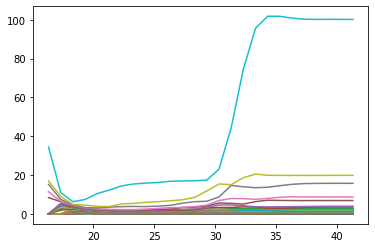

Landmark: 6


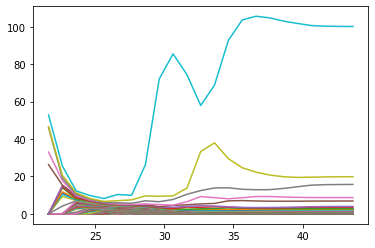

Landmark: 7


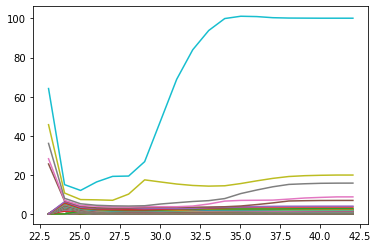

Landmark: 8


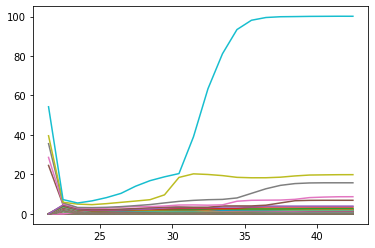

Landmark: 9


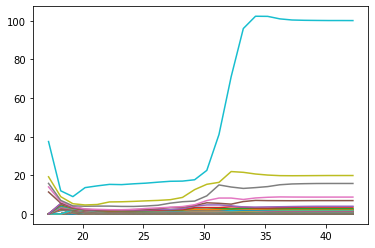

Landmark: 10


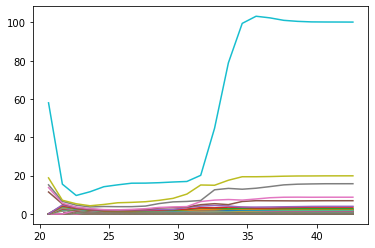

Landmark: 11


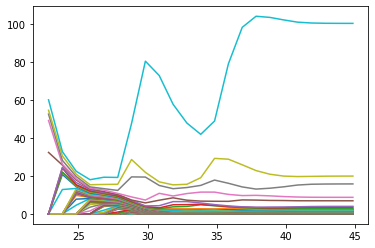

Landmark: 12


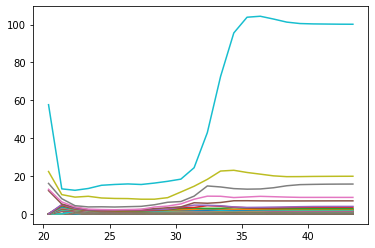

Landmark: 13


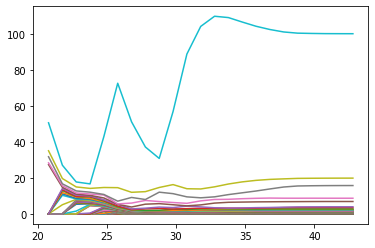

Landmark: 14


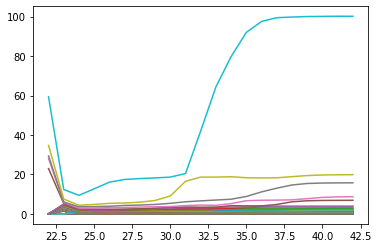

Landmark: 15


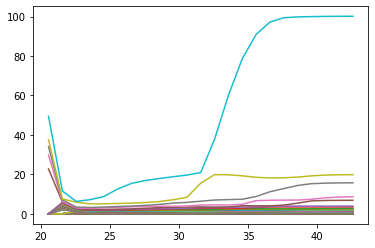

Landmark: 16


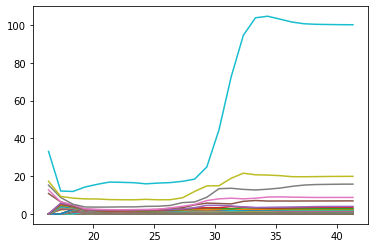

Landmark: 17


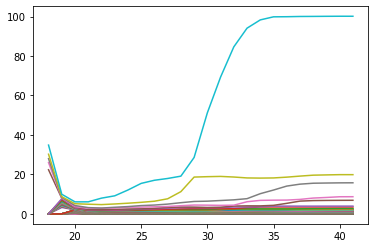

Landmark: 18


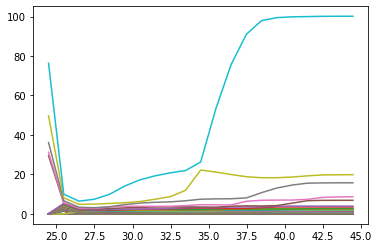

Landmark: 19


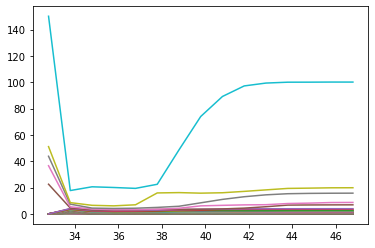

Landmark: 20


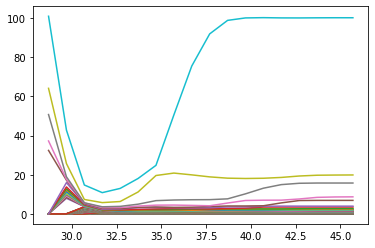

Landmark: 21


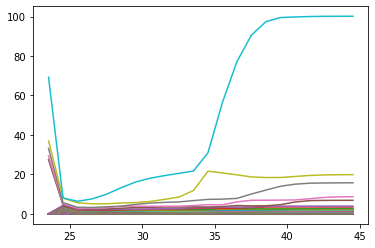

Landmark: 22


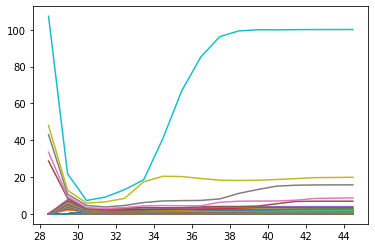

Landmark: 23


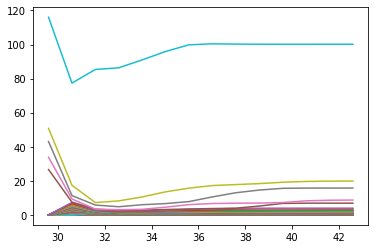

Landmark: 24


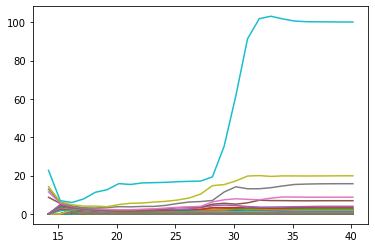

Landmark: 25


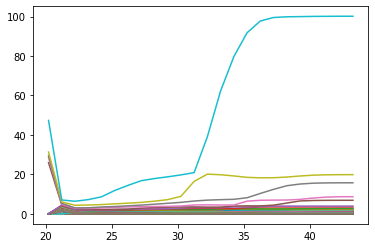

Landmark: 26


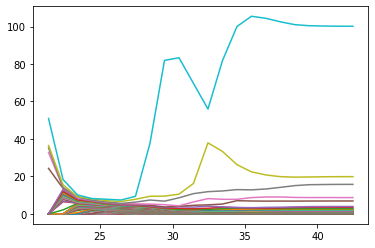

Landmark: 27


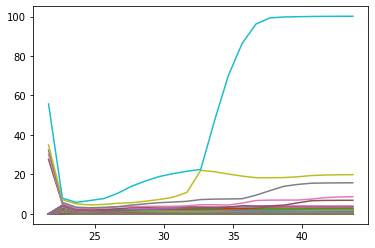

Landmark: 28


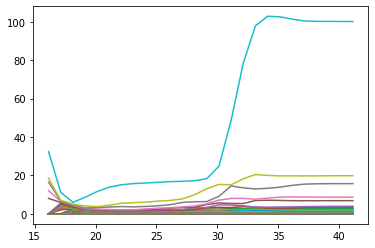

Landmark: 29


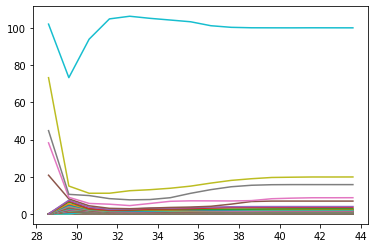

Landmark: 30


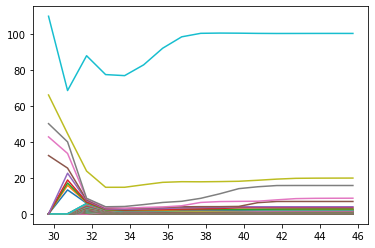

Landmark: 31


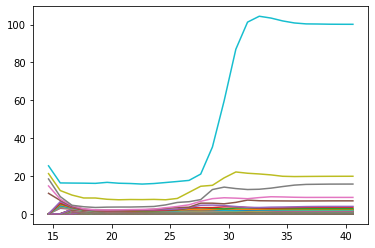

Landmark: 32


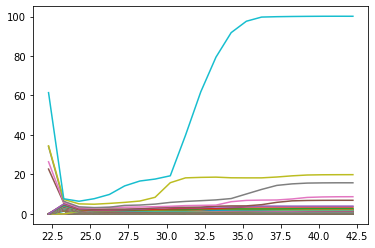

Landmark: 33


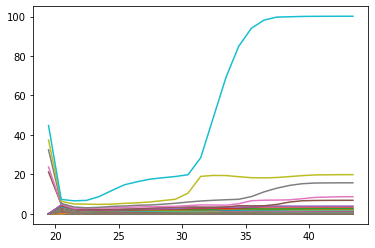

Landmark: 34


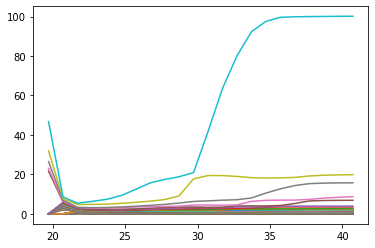

Landmark: 35


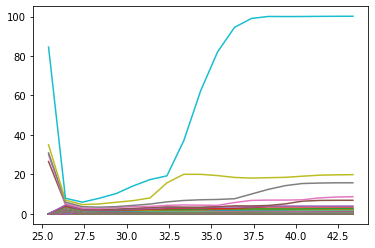

Landmark: 36


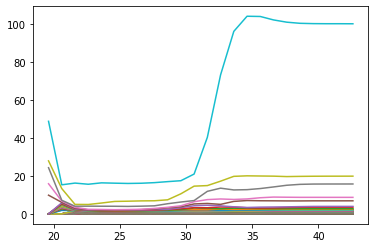

Landmark: 37


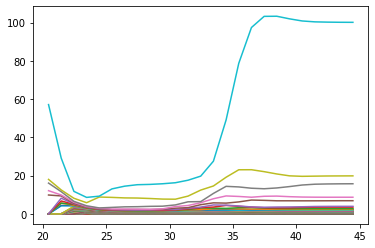

Landmark: 38


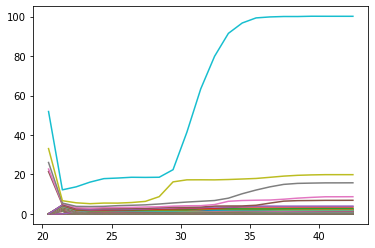

Landmark: 39


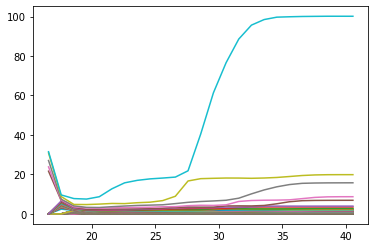

Landmark: 40


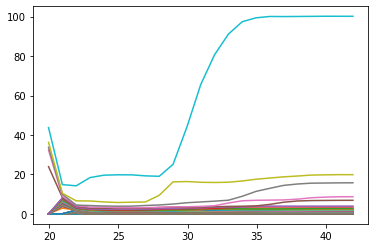

Landmark: 41


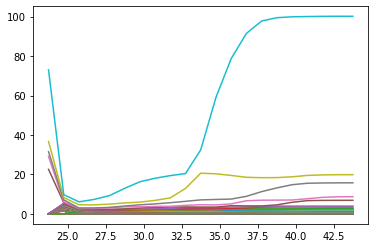

Landmark: 42


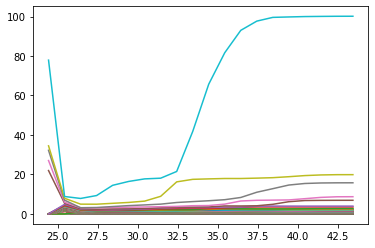

Landmark: 43


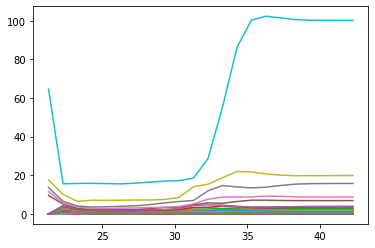

Landmark: 44


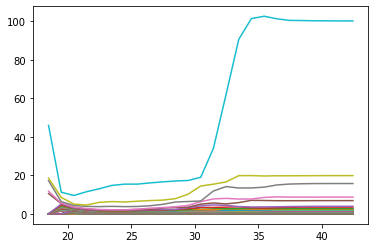

Landmark: 45


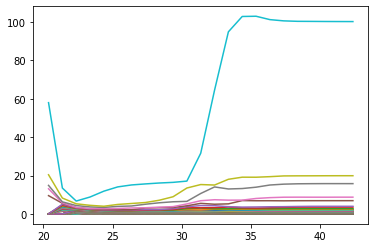

Landmark: 46


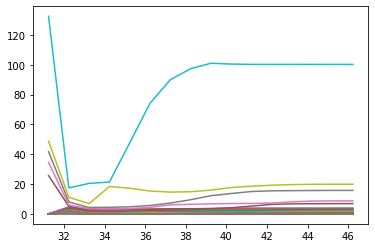

Landmark: 47


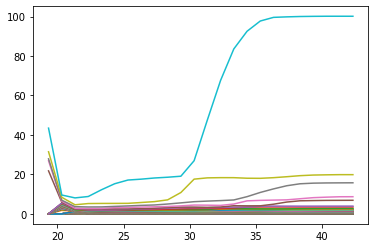

Landmark: 48


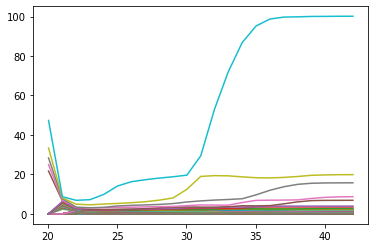

Landmark: 49


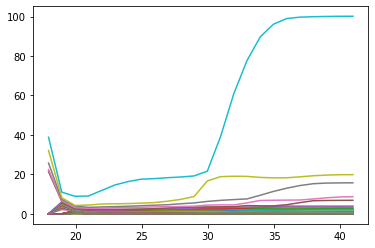

Landmark: 50


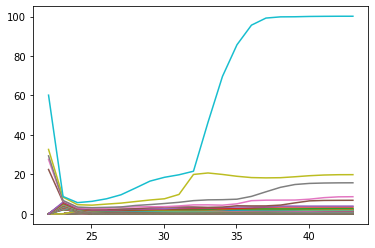

Landmark: 51


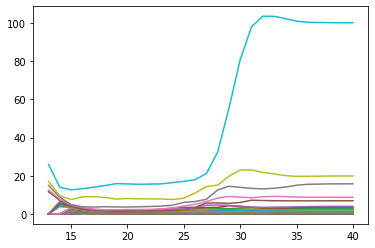

Landmark: 52


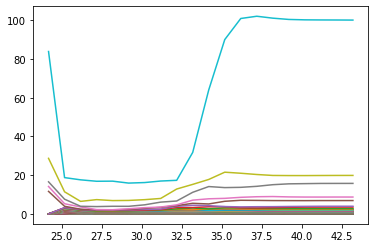

Landmark: 53


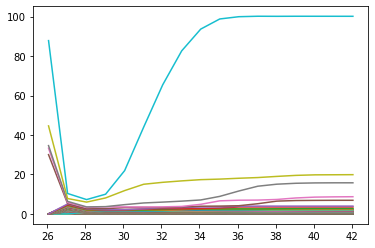

Landmark: 54


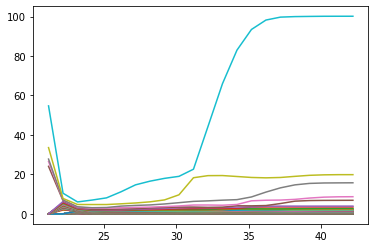

Landmark: 55


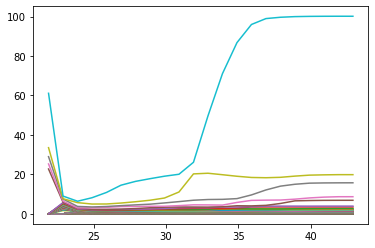

Landmark: 56


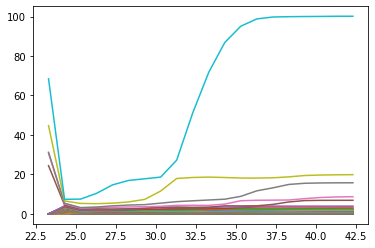

Landmark: 57


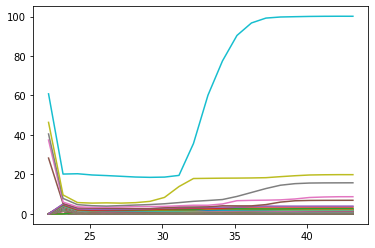

Landmark: 58


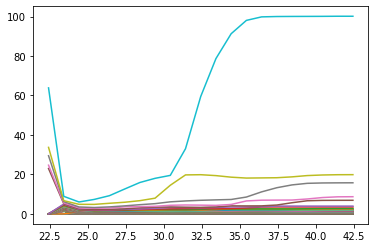

Landmark: 59


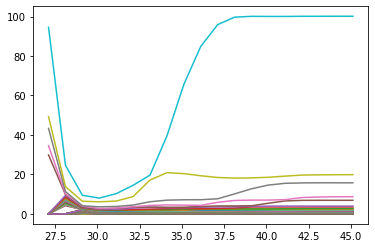

Landmark: 60


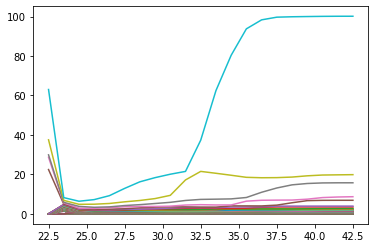

Landmark: 61


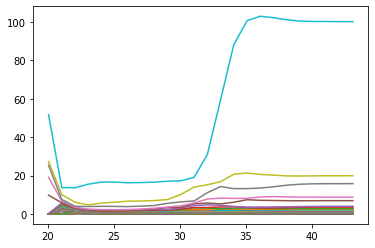

Landmark: 62


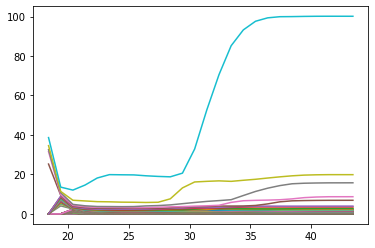

Landmark: 63


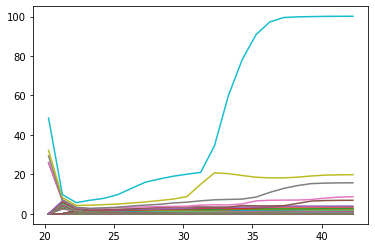

Landmark: 64


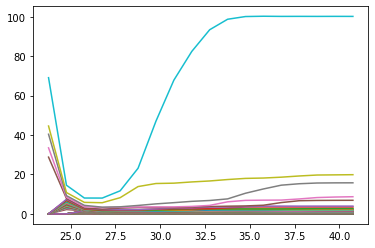

Landmark: 65


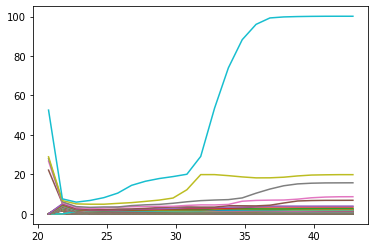

Landmark: 66


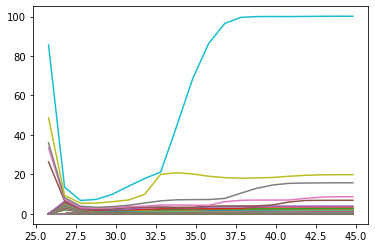

Landmark: 67


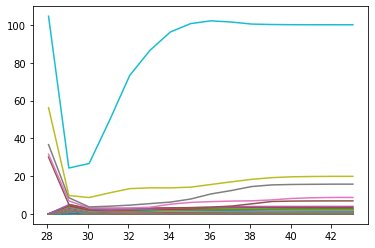

Landmark: 68


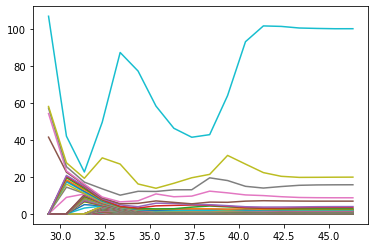

Landmark: 69


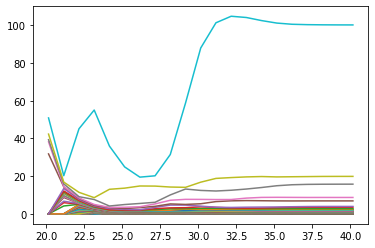

Landmark: 70


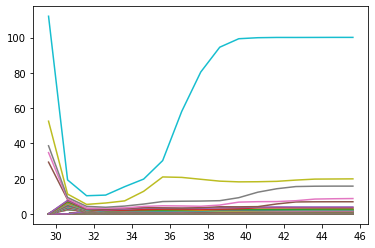

Landmark: 71


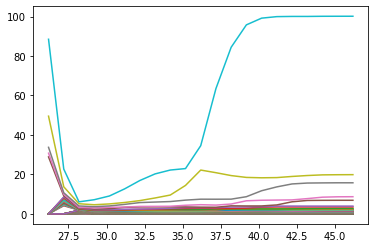

Landmark: 72


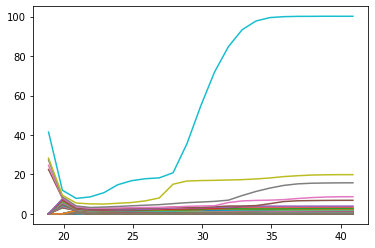

Landmark: 73


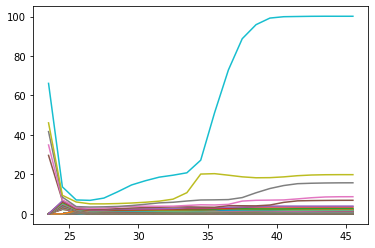

Landmark: 74


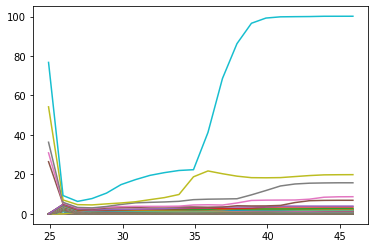

Landmark: 75


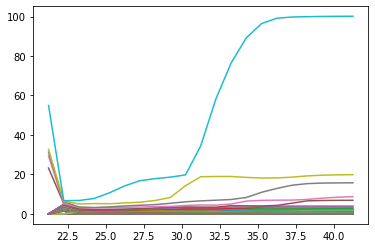

Landmark: 76


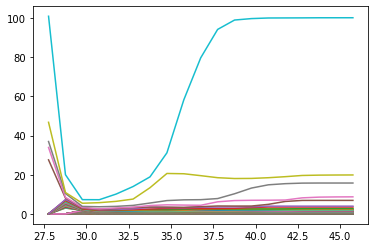

Landmark: 77


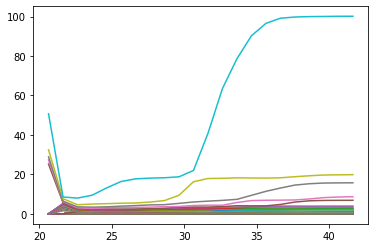

Landmark: 78


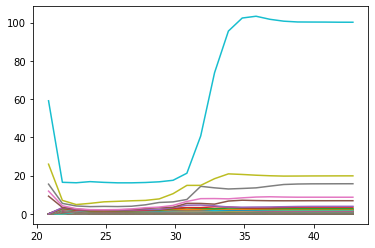

Landmark: 79


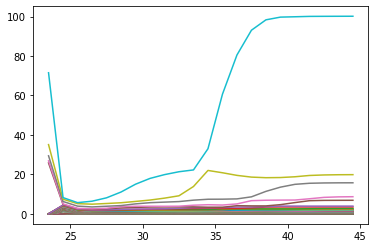

Landmark: 80


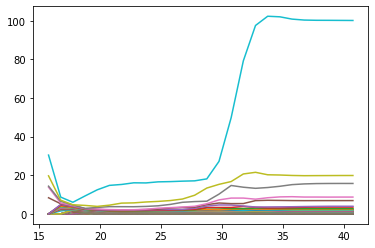

Landmark: 81


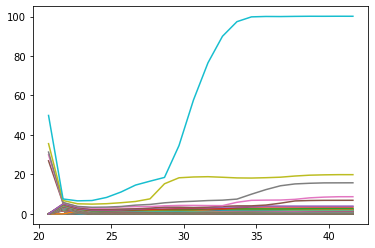

Landmark: 82


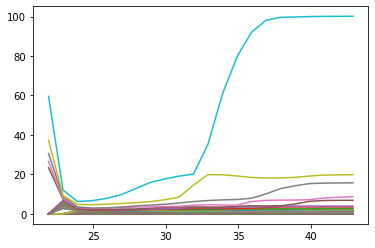

Landmark: 83


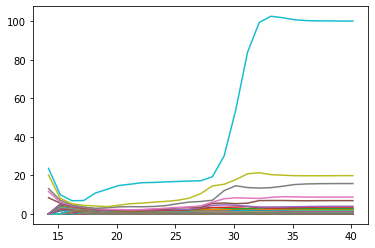

Landmark: 84


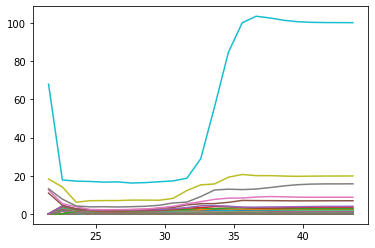

Landmark: 85


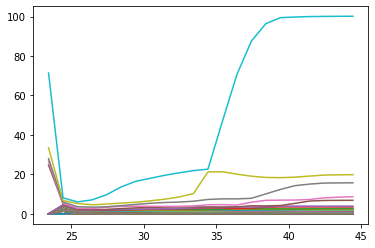

Landmark: 86


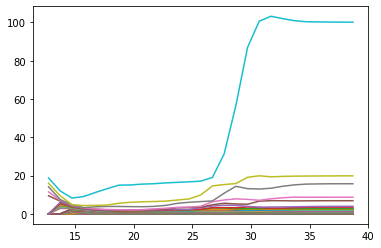

Landmark: 87


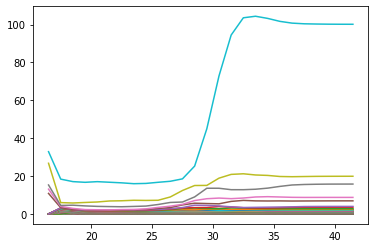

Landmark: 88


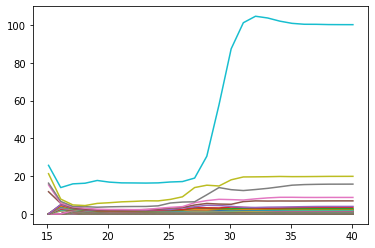

Landmark: 89


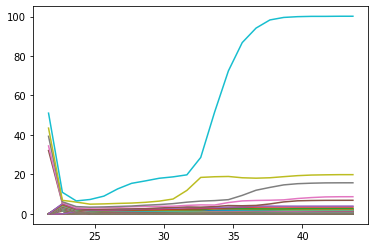

Landmark: 90


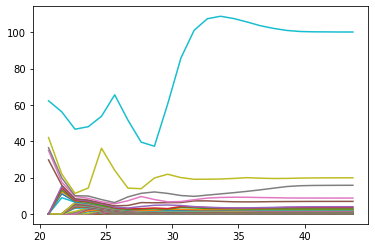

Landmark: 91


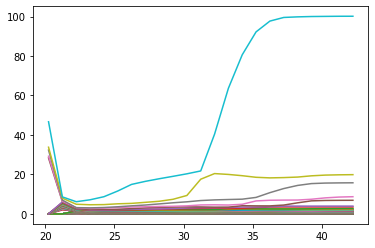

Landmark: 92


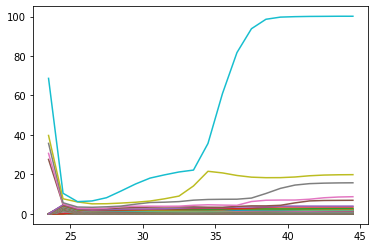

Landmark: 93


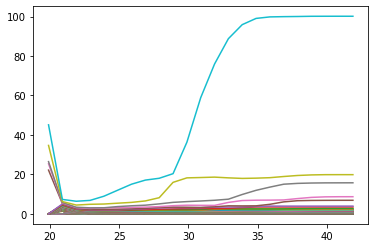

Landmark: 94


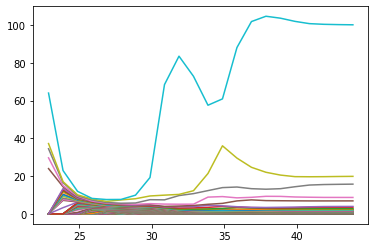

Landmark: 95


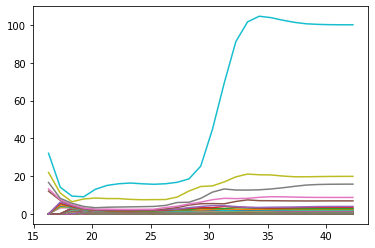

Landmark: 96


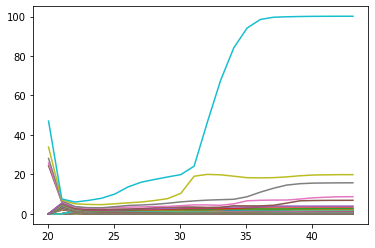

Landmark: 97


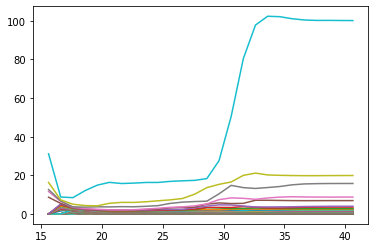

Landmark: 98


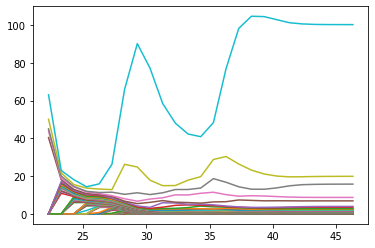

Landmark: 99


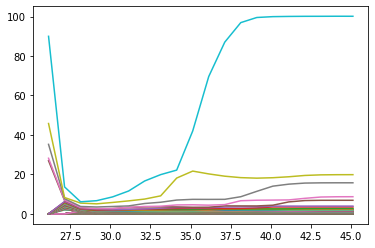

Landmark: 100


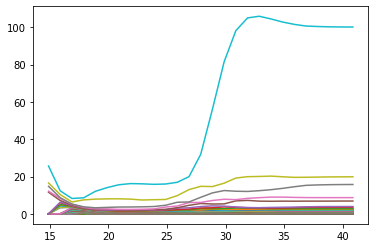

Landmark: 101


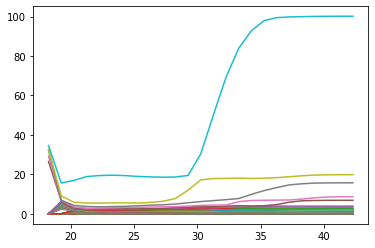

Landmark: 102


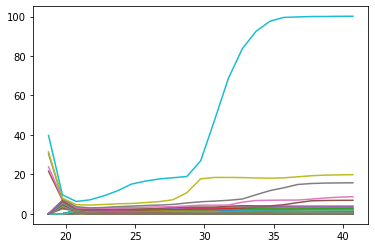

Landmark: 103


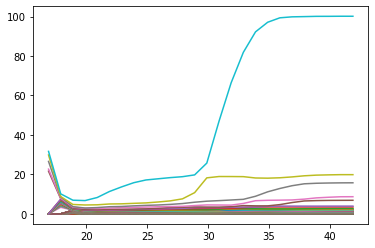

Landmark: 104


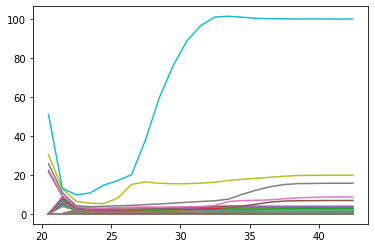

Landmark: 105


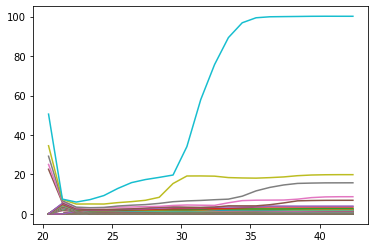

Landmark: 106


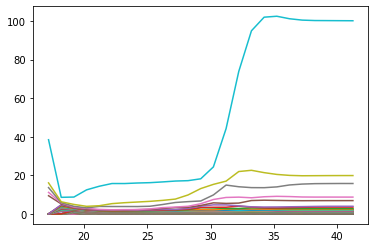

Landmark: 107


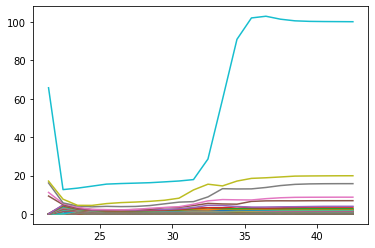

Landmark: 108


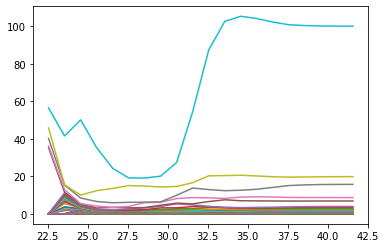

Landmark: 109


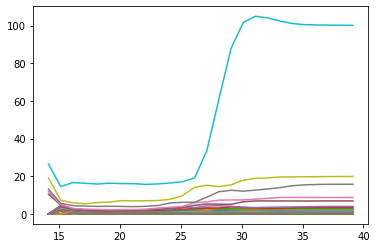

Landmark: 110


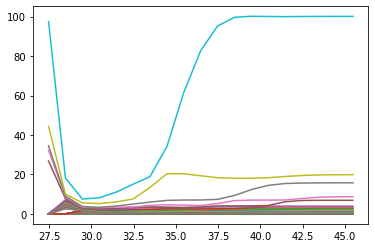

Landmark: 111


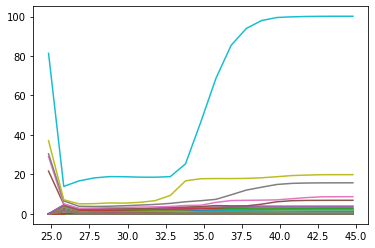

Landmark: 112


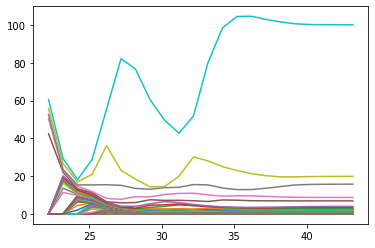

Landmark: 113


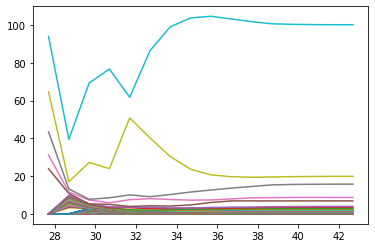

Landmark: 114


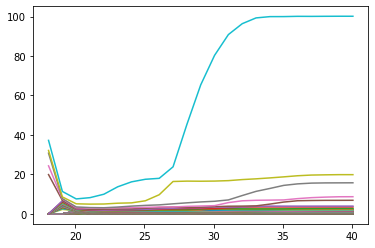

Landmark: 115


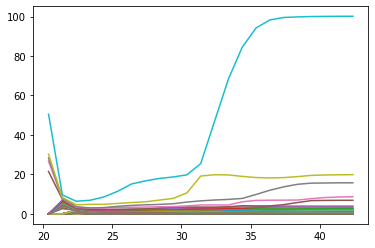

Landmark: 116


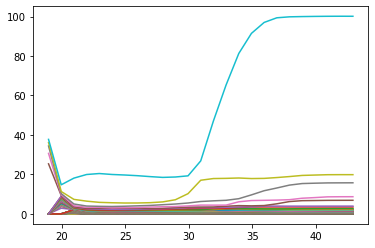

Landmark: 117


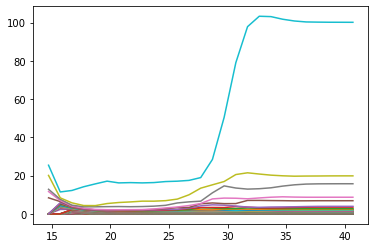

Landmark: 118


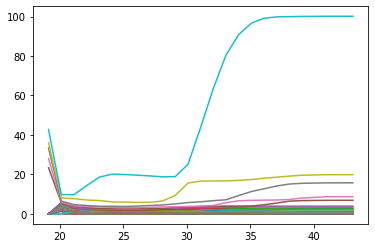

Landmark: 119


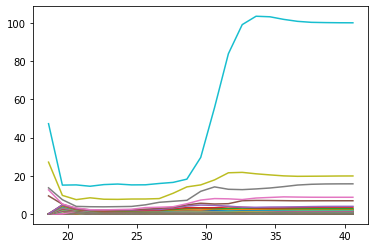

Landmark: 120


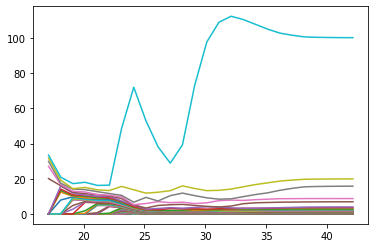

Landmark: 121


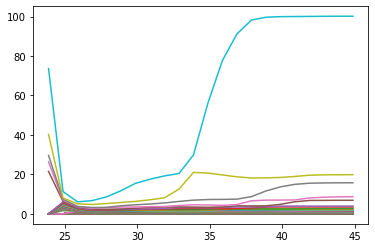

Landmark: 122


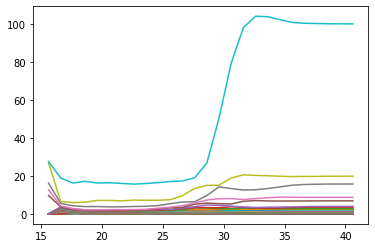

Landmark: 123


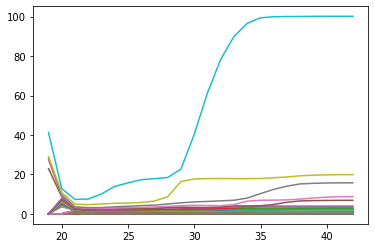

Landmark: 124


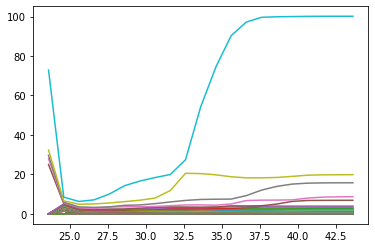

Landmark: 125


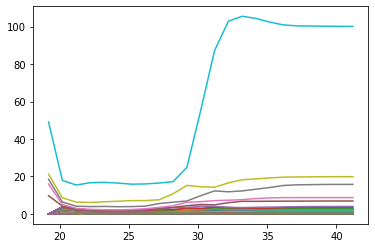

Landmark: 126


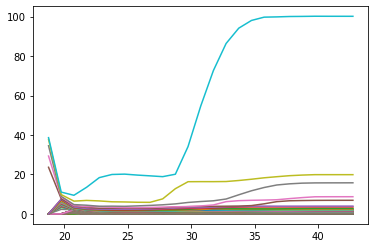

Landmark: 127


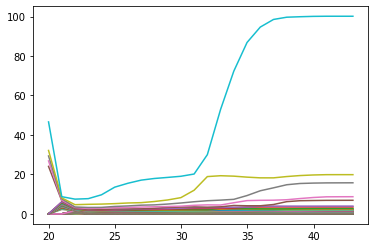

Landmark: 128


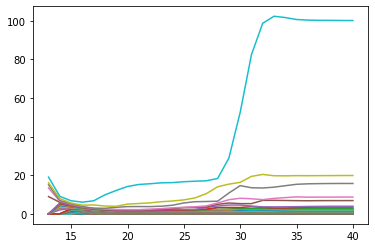

Landmark: 129


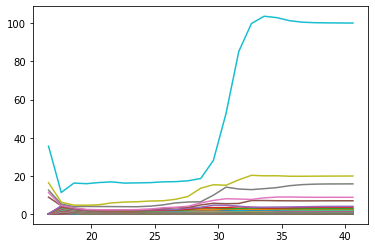

Landmark: 130


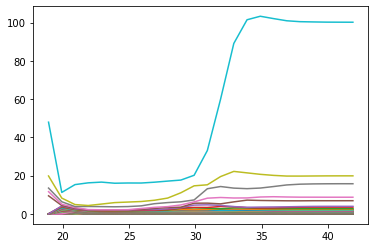

Landmark: 131


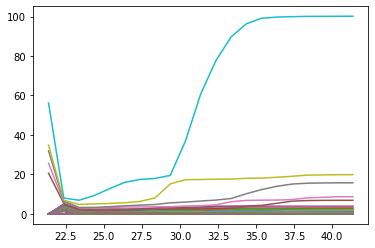

Landmark: 132


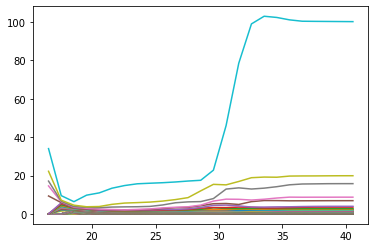

Landmark: 133


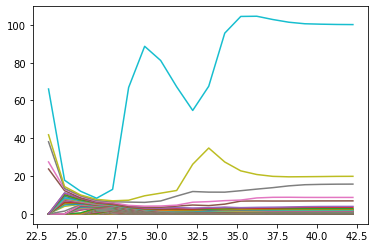

Landmark: 134


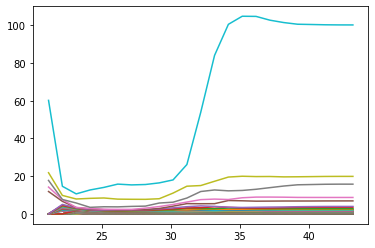

Landmark: 135


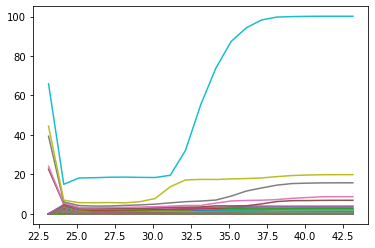

Landmark: 136


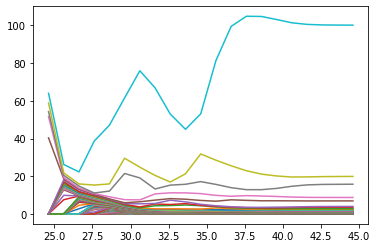

Landmark: 137


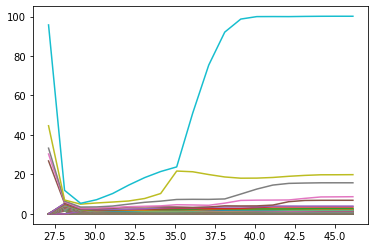

Landmark: 138


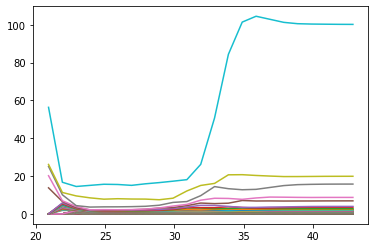

Landmark: 139


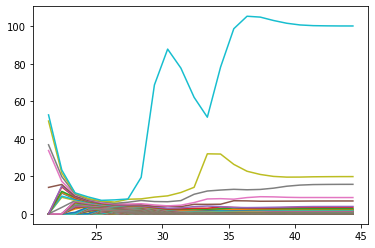

Landmark: 140


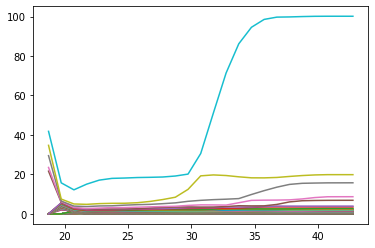

Landmark: 141


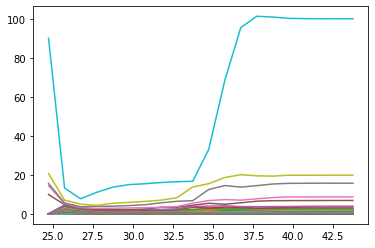

Landmark: 142


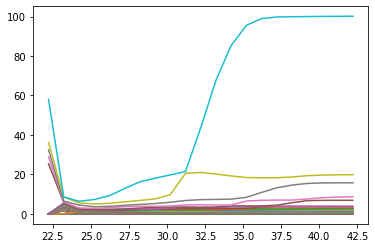

Landmark: 143


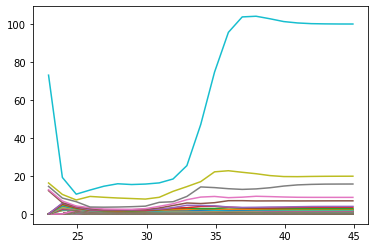

Landmark: 144


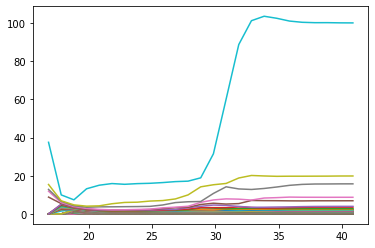

Landmark: 145


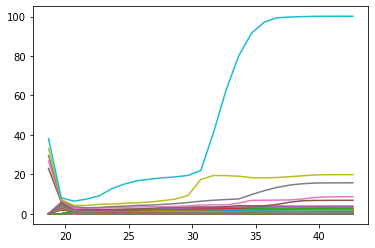

Landmark: 146


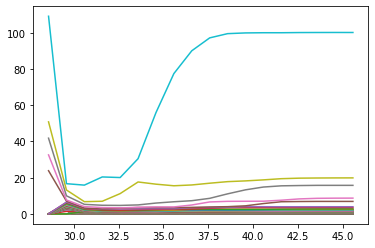

Landmark: 147


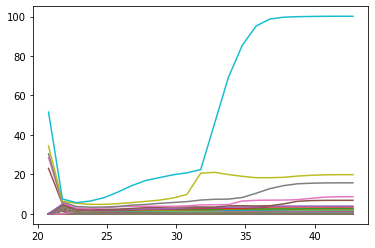

Landmark: 148


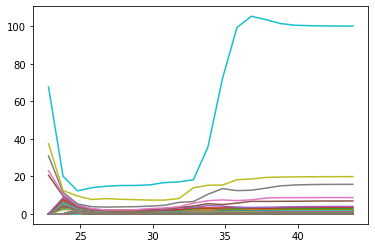

Landmark: 149


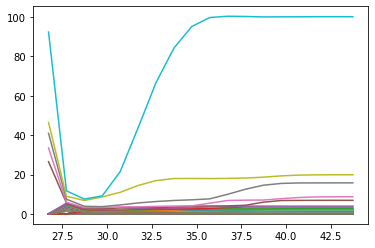

Landmark: 150


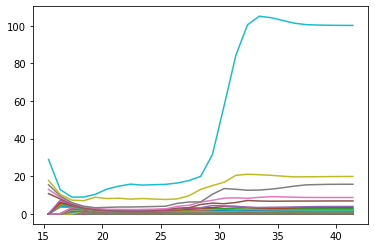

Landmark: 151


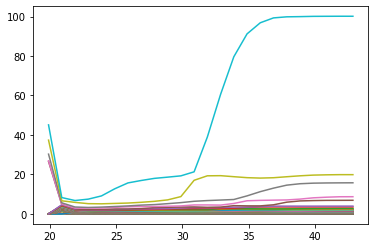

Landmark: 152


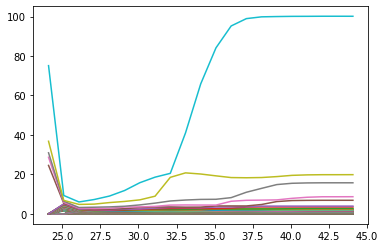

Landmark: 153


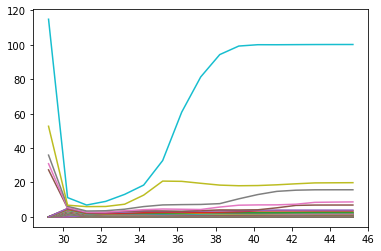

Landmark: 154


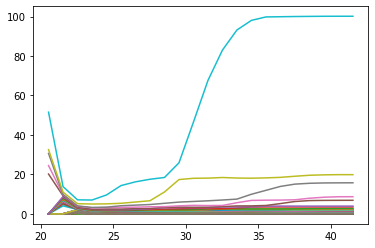

Landmark: 155


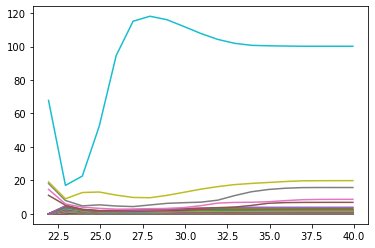

Landmark: 156


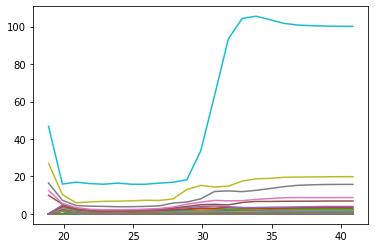

Landmark: 157


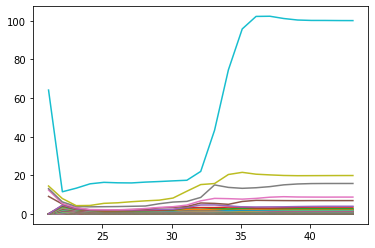

Landmark: 158


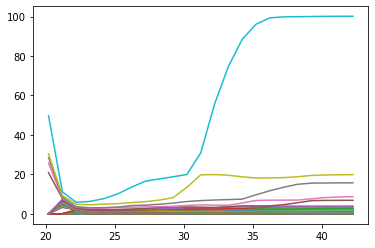

Landmark: 159


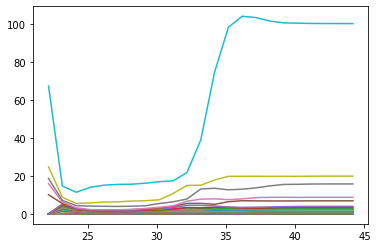

Landmark: 160


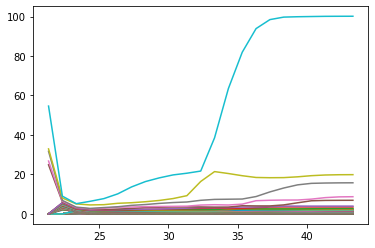

Landmark: 161


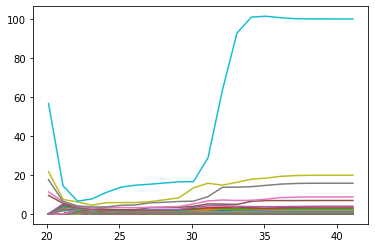

Landmark: 162


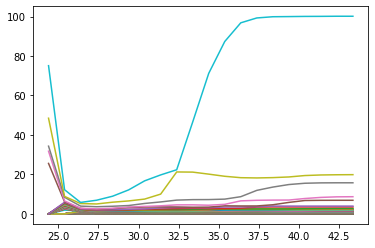

Landmark: 163


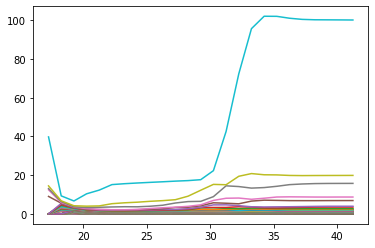

Landmark: 164


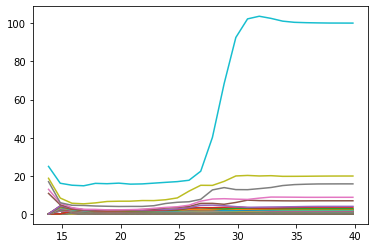

Landmark: 165


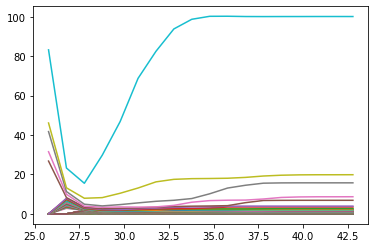

Landmark: 166


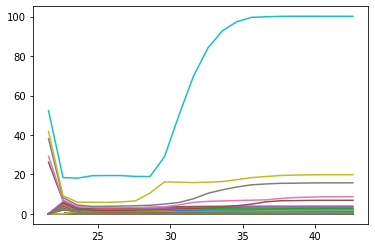

Landmark: 167


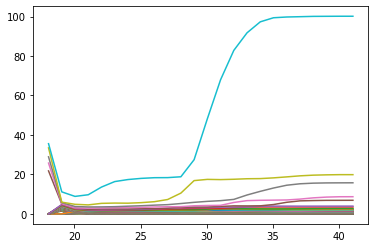

Landmark: 168


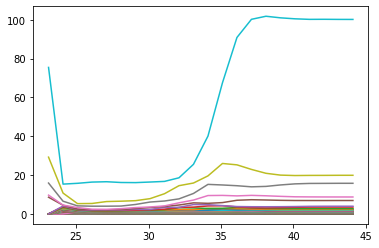

Landmark: 169


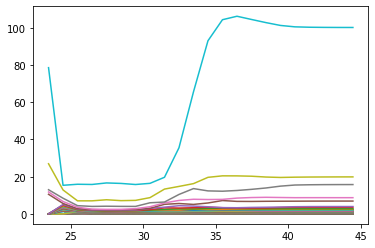

Landmark: 170


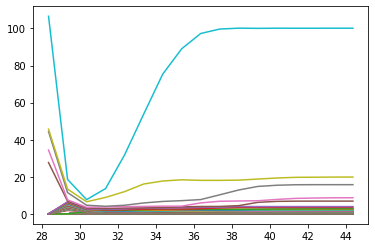

Landmark: 171


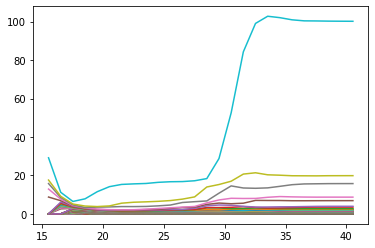

Landmark: 172


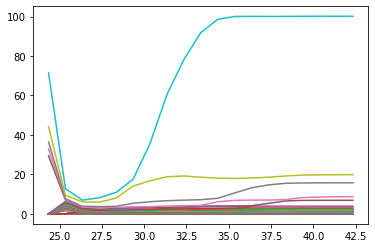

Landmark: 173


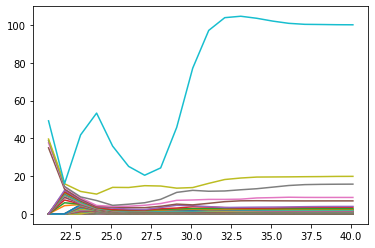

Landmark: 174


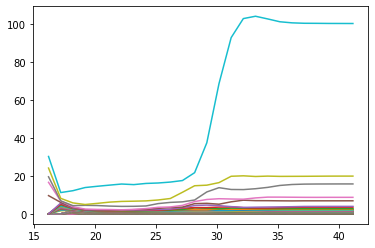

Landmark: 175


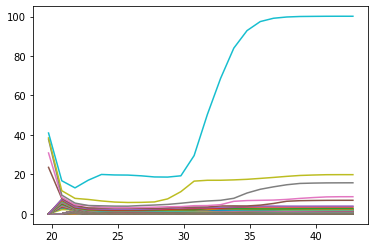

Landmark: 176


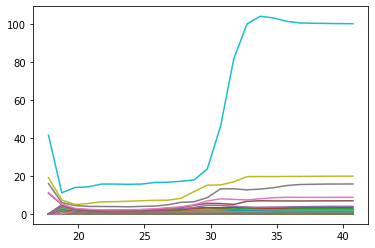

Landmark: 177


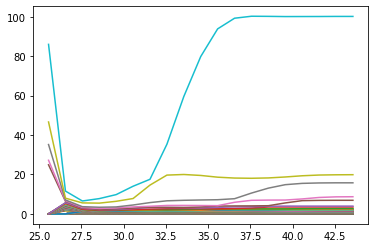

Landmark: 178


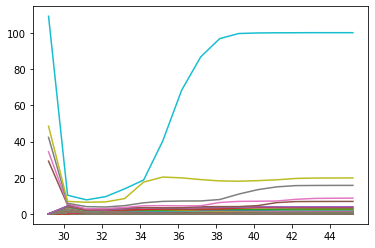

Landmark: 179


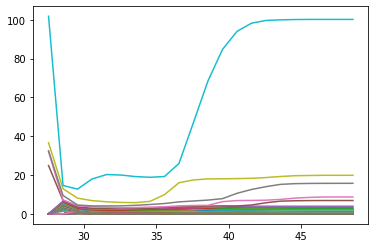

Landmark: 180


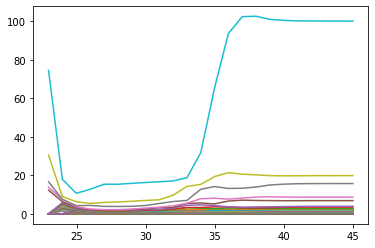

Landmark: 181


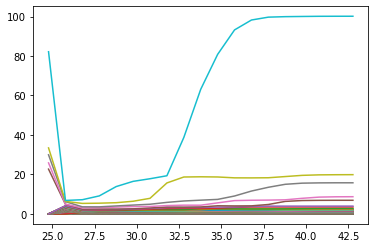

Landmark: 182


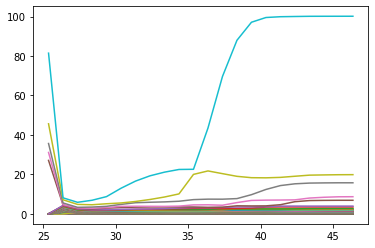

Landmark: 183


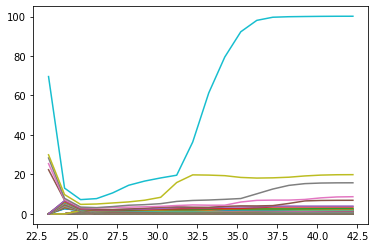

Landmark: 184


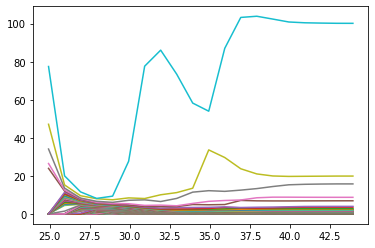

Landmark: 185


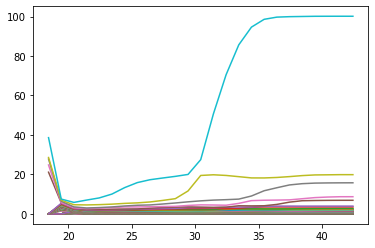

Landmark: 186


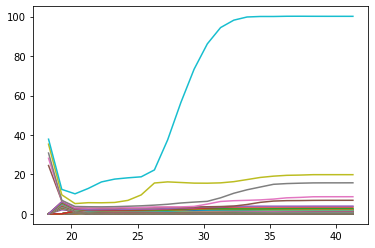

Landmark: 187


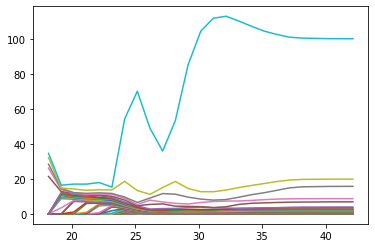

Landmark: 188


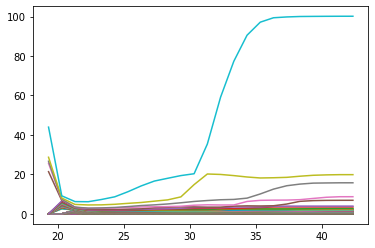

Landmark: 189


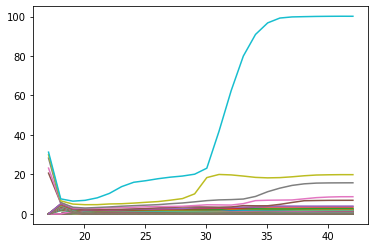

Landmark: 190


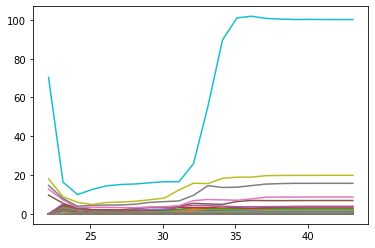

Landmark: 191


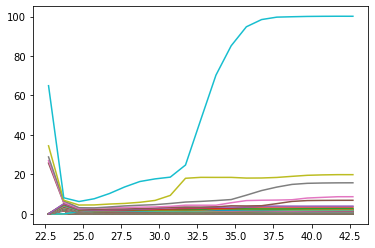

Landmark: 192


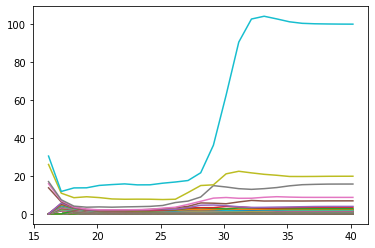

Landmark: 193


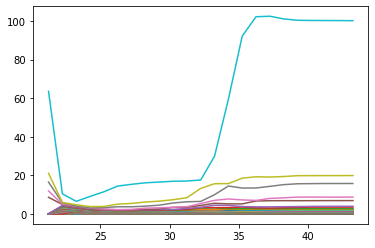

Landmark: 194


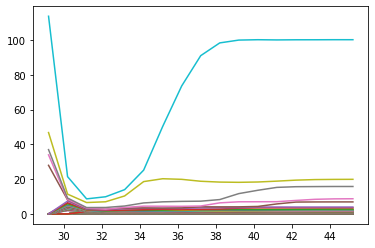

Landmark: 195


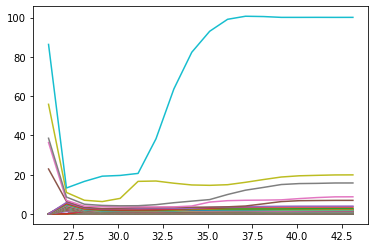

Landmark: 196


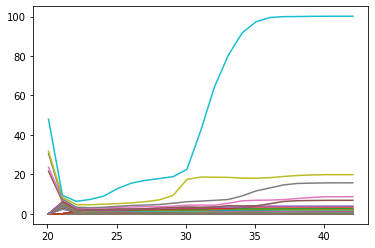

Landmark: 197


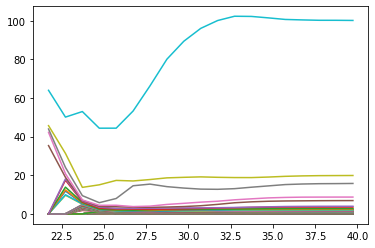

In [29]:
for i in range(len(landmarks)):
    center = landmarks[i]
    radii, eigval_list, eigvec_list = eigen_calc_from_dist_mat(np_data, dist_mat, center, radint = 1)

    rmin = radii[0]
    rmax = radii[-1]
    print("Landmark: "+repr(i))
    eigen_plot(eigval_list, radii, rmin, rmax)